# Read .edf files and convert to .h5
For import to MATLAB and Python
Script performs the following:
- Read .edf file
- Select only EEG channels/discard EOG, EMG
- Reference to the common average
- Filter DC offset and 60hz notch
- Export to .h5

In [1]:
import os
import numpy as np
import mne
import pathlib
import matplotlib.pyplot as plt

In [2]:
path=pathlib.Path('/media/tris/tris_files/EEG_datasets/MIT-Scalp-Seizure/physionet.org/files/chbmit')
path

PosixPath('/media/tris/tris_files/EEG_datasets/MIT-Scalp-Seizure/physionet.org/files/chbmit')

In [3]:
subject = 1
raw=mne.io.read_raw_edf('/media/tris/tris_files/EEG_datasets/MIT-Scalp-Seizure/physionet.org/files/chbmit/1.0.0/chb0'+str(subject)+'/chb0'+str(subject)+'_03.edf')
raw.load_data()

Extracting EDF parameters from /media/tris/tris_files/EEG_datasets/MIT-Scalp-Seizure/physionet.org/files/chbmit/1.0.0/chb01/chb01_03.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


<ipython-input-3-49a0e609f523>:2: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw=mne.io.read_raw_edf('/media/tris/tris_files/EEG_datasets/MIT-Scalp-Seizure/physionet.org/files/chbmit/1.0.0/chb0'+str(subject)+'/chb0'+str(subject)+'_03.edf')


<RawEDF | chb01_03.edf, 23 x 921600 (3600.0 s), ~161.8 MB, data loaded>

In [4]:
eeg_channels=raw.ch_names[0:23] #first 64 channels are the EEG ones
eeg_channels

['FP1-F7',
 'F7-T7',
 'T7-P7',
 'P7-O1',
 'FP1-F3',
 'F3-C3',
 'C3-P3',
 'P3-O1',
 'FP2-F4',
 'F4-C4',
 'C4-P4',
 'P4-O2',
 'FP2-F8',
 'F8-T8',
 'T8-P8-0',
 'P8-O2',
 'FZ-CZ',
 'CZ-PZ',
 'P7-T7',
 'T7-FT9',
 'FT9-FT10',
 'FT10-T8',
 'T8-P8-1']

In [5]:
raw.pick_channels(eeg_channels) #select only the EEG channels

<RawEDF | chb01_03.edf, 23 x 921600 (3600.0 s), ~161.8 MB, data loaded>

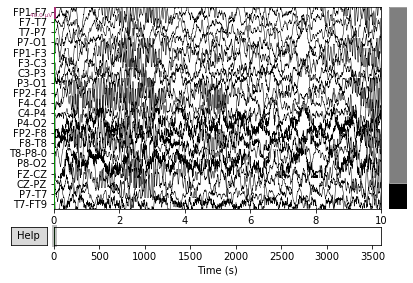

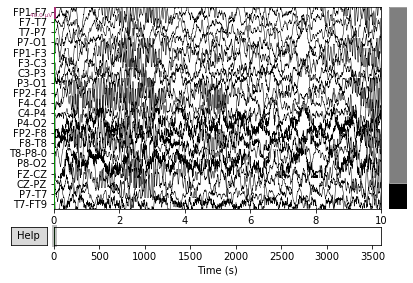

In [6]:
raw.plot()

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom EEG reference.


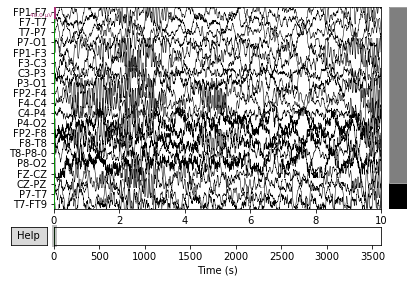

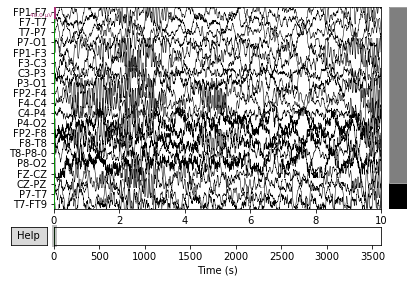

In [7]:
raw_avg=raw.copy().set_eeg_reference(ref_channels='average') #reference to the average (I think is more stable)
raw_avg.plot()

Effective window size : 8.000 (s)


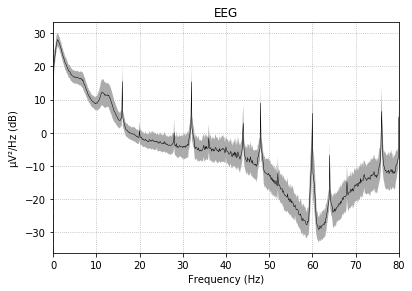

In [8]:
fig = raw_avg.plot_psd(tmax=np.inf, fmax=80, average=True) #check orginal PSD

In [9]:
ssp_projectors = raw.info['projs']
raw.del_proj()

<RawEDF | chb01_03.edf, 23 x 921600 (3600.0 s), ~161.8 MB, data loaded>

In [10]:
raw_avg.filter(4,50, fir_design='firwin')

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 4 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 4.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 3.00 Hz)
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 423 samples (1.652 sec)



<RawEDF | chb01_03.edf, 23 x 921600 (3600.0 s), ~161.8 MB, data loaded>

Effective window size : 8.000 (s)


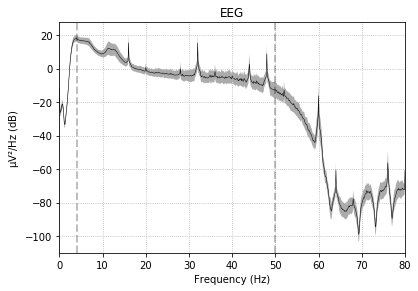

In [11]:
fig = raw_avg.plot_psd(tmax=np.inf, fmax=80, average=True) #check orginal PSD

Effective window size : 8.000 (s)


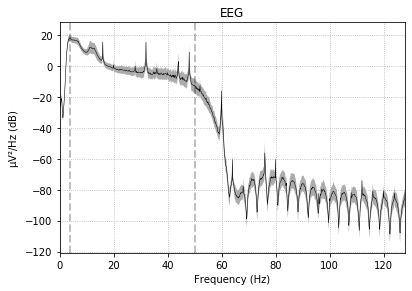

In [12]:
avg_psd=raw_avg.plot_psd(average=True)

In [13]:
df=raw_avg.to_data_frame()

In [17]:
df.to_hdf('/media/tris/tris_files/EEG_datasets/MIT-Scalp-Seizure/physionet.org/files/chbmit/1.0.0/chb01/export_h5/test.h5',key='df')

In [19]:
for n in range (1,2):
    for i in range (1,5):
        raw=mne.io.read_raw_edf('/media/tris/tris_files/EEG_datasets/MIT-Scalp-Seizure/physionet.org/files/chbmit/1.0.0/chb0'+str(n)+'/chb0'+str(n)+'_0'+str(i)+'.edf')
        raw.load_data()
        eeg_channels=raw.ch_names[0:23] #first 64 channels are the EEG ones
        raw.pick_channels(eeg_channels) #select only the EEG channels
        raw_avg=raw.copy().set_eeg_reference(ref_channels='average') #reference to the average (I think is more stable)
        raw_avg.filter(1.5,50, fir_design='firwin')
        df=raw_avg.to_data_frame()
        df.to_hdf('/media/tris/tris_files/EEG_datasets/MIT-Scalp-Seizure/physionet.org/files/chbmit/1.0.0/chb01/export_h5/S'+str(n)+'T0'+str(i)+'.h5',key='df')
#     for i in range (10,15):
#         raw=mne.io.read_raw_edf('/media/tris/tris_files/EEG_datasets/physionet.org/files/eegmmidb/1.0.0/S'+str(n)+'/S'+str(n)+'R'+str(i)+'.edf')
#         raw.load_data()
#         eeg_channels=raw.ch_names[0:64] #first 64 channels are the EEG ones
#         raw.pick_channels(eeg_channels) #select only the EEG channels
#         raw_avg=raw.copy().set_eeg_reference(ref_channels='average') #reference to the average (I think is more stable)
#         raw_avg.filter(1.5,50, fir_design='firwin')
#         df=raw_avg.to_data_frame()
#         df.to_hdf('/media/tris/tris_files/EEG_datasets/physionet.org/files/eegmmidb/1.0.0/export_h5/S'+str(n)+'R'+str(i)+'.h5',key='df')


Extracting EDF parameters from /media/tris/tris_files/EEG_datasets/MIT-Scalp-Seizure/physionet.org/files/chbmit/1.0.0/chb01/chb01_01.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


<ipython-input-19-f2287ff20fab>:3: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw=mne.io.read_raw_edf('/media/tris/tris_files/EEG_datasets/MIT-Scalp-Seizure/physionet.org/files/chbmit/1.0.0/chb0'+str(n)+'/chb0'+str(n)+'_0'+str(i)+'.edf')


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom EEG reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1.5 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.50
- Lower transition bandwidth: 1.50 Hz (-6 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 565 samples (2.207 sec)

Extracting EDF parameters from /media/tris/tris_files/EEG_datasets/MIT-Scalp-Seizure/physionet.org/files/chbmit/1.0.0/chb01/chb01_02.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


<ipython-input-19-f2287ff20fab>:3: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw=mne.io.read_raw_edf('/media/tris/tris_files/EEG_datasets/MIT-Scalp-Seizure/physionet.org/files/chbmit/1.0.0/chb0'+str(n)+'/chb0'+str(n)+'_0'+str(i)+'.edf')


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom EEG reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1.5 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.50
- Lower transition bandwidth: 1.50 Hz (-6 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 565 samples (2.207 sec)

Extracting EDF parameters from /media/tris/tris_files/EEG_datasets/MIT-Scalp-Seizure/physionet.org/files/chbmit/1.0.0/chb01/chb01_03.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


<ipython-input-19-f2287ff20fab>:3: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw=mne.io.read_raw_edf('/media/tris/tris_files/EEG_datasets/MIT-Scalp-Seizure/physionet.org/files/chbmit/1.0.0/chb0'+str(n)+'/chb0'+str(n)+'_0'+str(i)+'.edf')


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom EEG reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1.5 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.50
- Lower transition bandwidth: 1.50 Hz (-6 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 565 samples (2.207 sec)

Extracting EDF parameters from /media/tris/tris_files/EEG_datasets/MIT-Scalp-Seizure/physionet.org/files/chbmit/1.0.0/chb01/chb01_04.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


<ipython-input-19-f2287ff20fab>:3: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw=mne.io.read_raw_edf('/media/tris/tris_files/EEG_datasets/MIT-Scalp-Seizure/physionet.org/files/chbmit/1.0.0/chb0'+str(n)+'/chb0'+str(n)+'_0'+str(i)+'.edf')


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom EEG reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1.5 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.50
- Lower transition bandwidth: 1.50 Hz (-6 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 565 samples (2.207 sec)

